## Homework 11

#### *DATA 1010*

In [1]:
using Pkg; Pkg.activate(".");

Activating environment at `~/Google Drive/DSI/Masters Program/DATA 1010/DATA1010-2019/problem-sets/hw11/Project.toml`


In [2]:
using Plots, Clustering, Distributions, Statistics
using DataStructures: DefaultDict
gr(fontfamily = "Palatino", legend = false);

## Problem 1

In this problem, we will carry out the plan we detailed in class on November 15 for sampling from a particular probability measure on the set of possible tweets. See Problem 3 from the [class notebook](https://nbviewer.jupyter.org/github/data1010/problem-sets/blob/master/11-15/data1010-11-15.ipynb) for details. 

Step 1: In lieu of scraping tweets, we'll use Moby Dick to estimate English language letter-pair frequencies. Read in the document as a string, and perform the following cleaning steps: 

(a) Use `lowercase` to lowercase every letter.  

(b) Use `replace` to replace every `\n` with a space.  

(c) Use `replace` to replace every character that is not a lowercase letter or space with the empty string. You'll want to use regular expressions for this; if you aren't familiar, check out [regexr.com](https://regexr.com) for some helpful information and tools. The `replace` function accepts a string and a replacement *pair*, as in: `replace(string_to_replace_in, regex => replacement_string)`.  A regex literal is a string preceded with `r`, as in `r"[a-z]"`. 

(d) Use `replace` to replace every instance where multiple spaces appear consecutively with a single space. Once again, you'll want to use regular expressions. 

In [3]:
doc = read("mobydick.txt", String);

Note: if you feel that you're not well positioned to do this part of the problem in a reasonable amount of time, you can submit your name [here](https://airtable.com/shrN9OQDP8ox84lkx) and get a working piece of code for this part of the problem.

In [4]:
text = replace(replace(replace(lowercase(doc),"\n" => " "), 
                                              r"[^a-z ]" => ""), 
                                              r" +" => " ");

Step 2: Build a dictionary storing the number of occurrences of each pair of consecutive letters. Use a `DefaultDict` in case there are letter pairs which never occur.

In [5]:
tallies = DefaultDict(0)
for i in 1:length(text)-1
    tallies[(text[i],text[i+1])]+= 1
end

Step 3: Convert this count map into a proportion map by dividing each dictionary value by the number of letter pairs in the cleaned document.

In [6]:
s = sum(values(tallies))
pair_frequencies = DefaultDict(0)
for (a,b) in tallies
    pair_frequencies[a] = b/s
end
g(a,b) = pair_frequencies[(a,b)]

g (generic function with 1 method)

Step 4: Write a function which carries out `n_iterations` Metropolis-Hastings updates beginning with the tweet `aaaaa...a` (that's 280 `a`s). 

Notes: represent the tweet as a character array rather than a string (like `tweet = fill('a', 280)`), so you can mutate one element at a time without having to copy the string. You can `join` the array to return an ordinary string at the end of the function body. Also, watch out for positions 1 and 280; they require separate handling.

In [7]:
function sample_tweet(n_iterations)
    n_iterations = 10_000
    tweet = fill('a', 280)
    α(prev_char, old_char, next_char, new_char) = 
        g(prev_char, new_char) * g(new_char, next_char) / (g(prev_char, old_char) * g(old_char, next_char))
    α₁(old_char, next_char, new_char) = g(new_char, next_char) / g(old_char, next_char)
    αₙ(prev_char, old_char, new_char) = g(prev_char, new_char) / g(prev_char, old_char)
    for i in 1:n_iterations
        position = rand(1:280)
        new_char = ['a':'z'; ' '][rand(1:27)]
        if position == 1 && rand() < α₁(tweet[position:position+1]..., new_char) ||
           position == 280 && rand() < αₙ(tweet[position-1:position]..., new_char) ||
           1 < position < 280 && rand() < α(tweet[position-1:position+1]..., new_char)
            tweet[position] = new_char
        end
    end
    join(tweet)
end

sample_tweet (generic function with 1 method)

## Problem 2 

A **clustering** algorithm takes a collection of points and an integer $k$ as input and returns a partition of those points into $k$ groups. 

(a) Visually group the points in the scatter plot below into three clusters. (Nothing to write here; just do it in your head before scrolling down.)

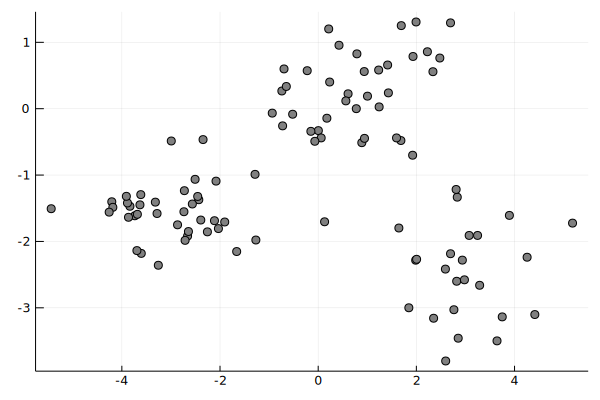

In [8]:
include("clustering-points.jl")

One of the most fundamental clustering algorithms is called ***k*-means**, and it returns the grouping which minimizes the sum of squared distances from each point to its group's centroid:

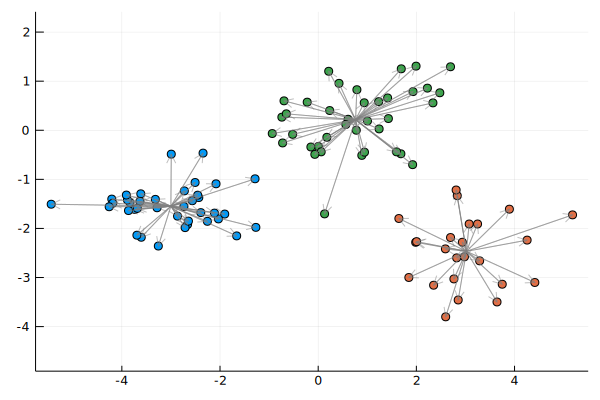

In [9]:
clusters = kmeans(hcat(X...), 3)
centers = Tuple.(eachcol(getproperty(clusters, :centers)))
function showclusters(X, centers, groups; kw...)
    scatter(Tuple.(X), group = groups, ratio = 1; kw...)
    for (point, group) in zip(X, groups)
        plot!([centers[group], Tuple(point)], lineopacity = 0.5, 
              arrow = arrow(), color = :gray)
    end
    current()
end
showclusters(X, centers, getproperty(clusters, :assignments))

The standard $k$-means algorithm proceeds by choosing $k$ initial centers randomly, identifying for each point which center it's closest to, and updating the centers to be the centroids of the points assigned thereto.

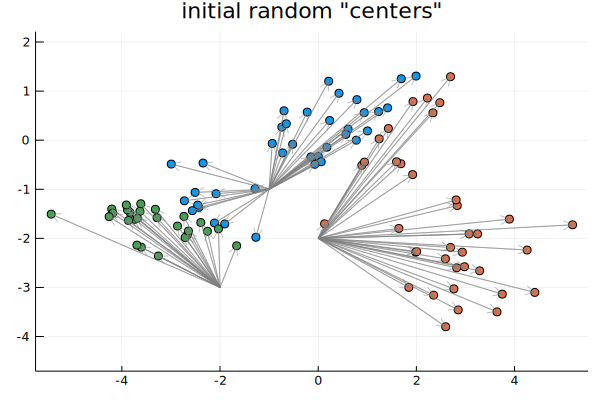

In [10]:
centers = [[-1, -1], [0, -2], [-2, -3]]
groups = [argmin([norm(x-c) for c in centers]) for x in X]
showclusters(X, Tuple.(centers), groups; title = "initial random \"centers\"")

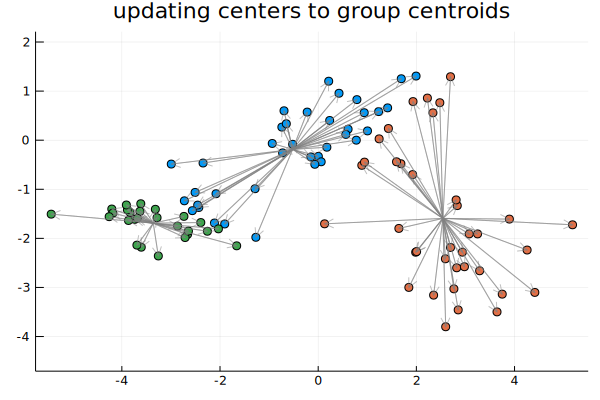

In [11]:
centers = [mean(X[groups .== c]) for c in 1:3]
showclusters(X, Tuple.(centers), groups, title = "updating centers to group centroids")

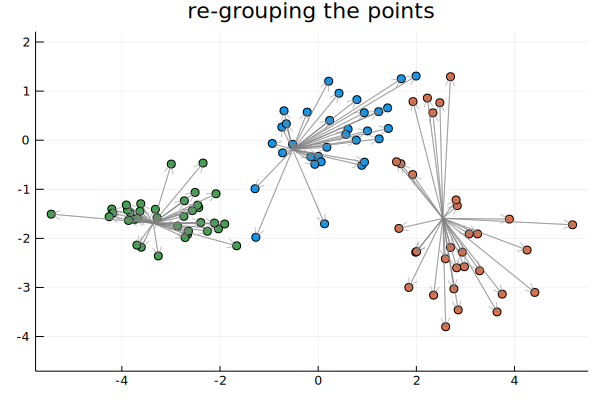

In [12]:
groups = [argmin([norm(x-c) for c in centers]) for x in X]
showclusters(X, Tuple.(centers), groups, title = "re-grouping the points")

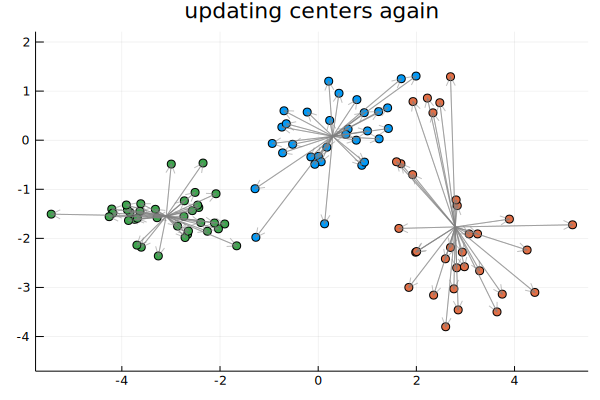

In [13]:
centers = [mean(X[groups .== c]) for c in 1:3]
showclusters(X, Tuple.(centers), groups, title = "updating centers again")

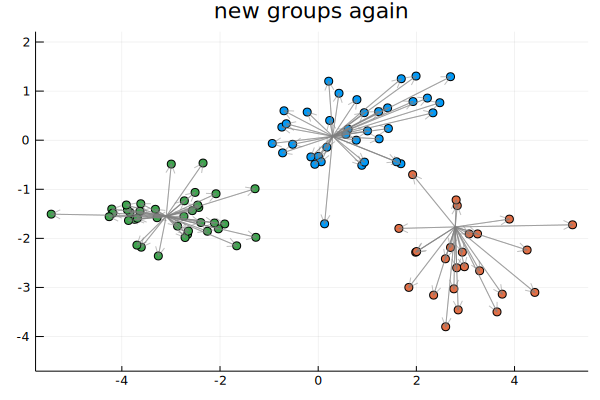

In [14]:
groups = [argmin([norm(x-c) for c in centers]) for x in X]
showclusters(X, Tuple.(centers), groups, title = "new groups again")

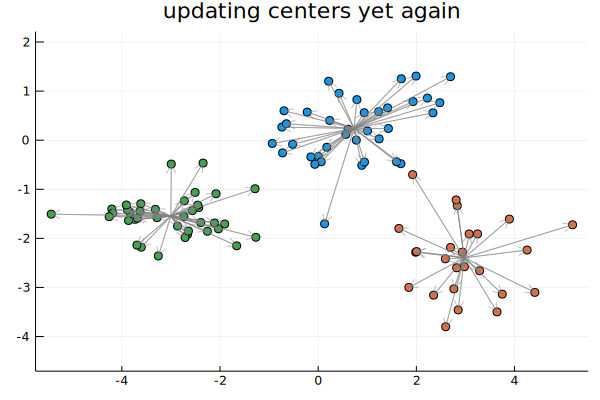

In [15]:
centers = [mean(X[groups .== c]) for c in 1:3]
showclusters(X, Tuple.(centers), groups, title = "updating centers yet again")

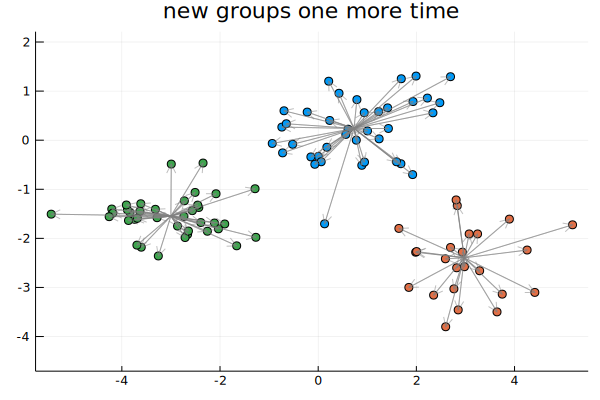

In [16]:
groups = [argmin([norm(x-c) for c in centers]) for x in X]
showclusters(X, Tuple.(centers), groups, title = "new groups one more time")

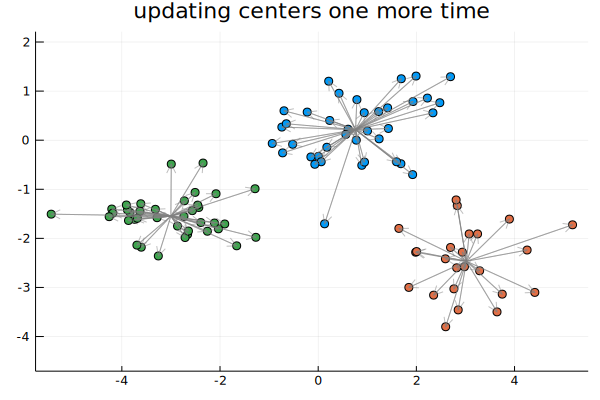

In [17]:
centers = [mean(X[groups .== c]) for c in 1:3]
showclusters(X, Tuple.(centers), groups, title = "updating centers one more time")

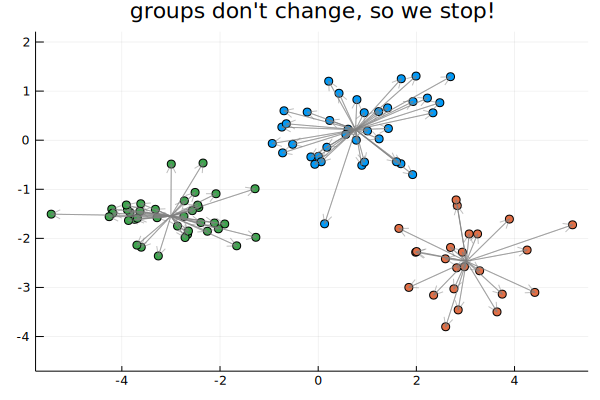

In [18]:
groups = [argmin([norm(x-c) for c in centers]) for x in X]
showclusters(X, Tuple.(centers), groups, title = "groups don't change, so we stop!")

(b) Is $k$-means sensitive to the scaling of the features? In other words, if we change units for $x_1$, does that potentially change the resulting clusters? 

Yes, it's scale sensitive because it's combining feature differences along the different axes using the Euclidean distance formula.

In class we described the Gaussian mixture model (GMM) sort of like a clustering algorithm, because almost all of the points could be described as "clearly purple" or "clearly green." (Note that the means of the Gaussians in the GMM play a similar role to the $k$-means centroids.)

We can make the GMM into an actual clustering algorithm by associating each point with the value of the hidden variable $Z$ with the largest conditional probability given the point's observed $X$ value. In other words, in the two-cluster case, we check for each point $\mathbf{x}_i$ whether its corresponding $\pi_i$ value is less than 1/2. 

Let's make a connection between the GMM (as a clustering algorithm) and $k$-means:

(b) Suppose that rather than estimating the covariance matrices at each step in the EM algorithm for the Gaussian mixture model, we treat them as constant matrices of the form $\epsilon I$ (where $I$ is the identity matrix and $\epsilon$ is some fixed, small constant). Show that with this adjustment, the EM algorithm for the Gaussian mixture model with very small $\epsilon$ is approximately the same as the $k$-means clustering algorithm. 


The key point here is that when $\epsilon$ is very small, the weights for almost every point are very close to being 1 in the position of the nearest center and 0 in the other positions. That's because 
$$
\frac{e^{a/(2\epsilon^2)}}{e^{a/(2\epsilon^2)} + e^{b/(2\epsilon^2)} + e^{c/(2\epsilon^2)}}
$$
is approximately equal to 1 if $a$ is larger than both $b$ and $c$ and 0 if $b$ or $c$ is larger.